# FlowerID by CNN

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Get the total, available, and used memory of the system in a readable format like "GB" or "MB".

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Info", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")

======================================== Memory Info ========================================
Total: 12.67GB
Available: 11.32GB
Used: 1.04GB


In [ ]:
# Update the path to a local directory where the 'flowers' dataset is located
#data_dir = '/Users/yashadakulkarni/Desktop/WORK/DataAnalyticsBootcamp/HOMEWORK/Flower-Identification-using-deep-learning/flowers'

# Import & Load Data

In [ ]:
#Import Data
import os
import requests
from zipfile import ZipFile
from io import BytesIO
from sklearn.datasets import load_files
# Define the URL of the dataset
url = 'https://github.com/SriPenumatcha/Flower-Identification-using-deep-learning/archive/refs/heads/main.zip'

# Download the dataset
response = requests.get(url)
if response.status_code == 200:

    # Extract the dataset
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/tmp')

# Path to the extracted dataset
data_dir = '/tmp/Flower-Identification-using-deep-learning-main/flowers'

# Load the data
data = load_files(data_dir)

In [ ]:
# List the contents of the Folder
folders = os.listdir(data_dir)
print(folders)

['daisy', 'sunflower', 'rose', 'tulip', 'dandelion']


# DATA Processing and Exploration

# We have a folder for each flower class or type. Load this data into two NumPy arrays:

- X: Filenames (features)
- y: Flower names (target labels)

In [ ]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# Arrays
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg'
 ...
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/10386540106_1431e73086_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/164670176_9f5b9c7965.jpg']
Target labels -  [3 1 1 ... 1 3 3]


In [ ]:
#Save the names of the imagefiles so they can be used later
imagefile_names = data['filenames']
print(imagefile_names)

['/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg'
 ...
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/10386540106_1431e73086_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/164670176_9f5b9c7965.jpg']


The numbers in the **Target labels as [3 1 1 ... 1 3 3]** are corresponding to class label. We need to change them to a vector of 5 elements (5 classes)

Sample 1 - Label: 3 - Folder: tulip - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg
Features (X):
-----------------------------------------------------
Sample 2 - Label: 1 - Folder: sunflower - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg
Features (X):
-----------------------------------------------------
Sample 3 - Label: 1 - Folder: sunflower - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg
Features (X):
-----------------------------------------------------
Sample 4 - Label: 0 - Folder: daisy - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/daisy/4851353993_2cbbbd1040_n.jpg
Features (X):
-----------------------------------------------------
Sample 5 - Label: 4 - Folder: dandelion - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/tulip/2271507463_15c48d

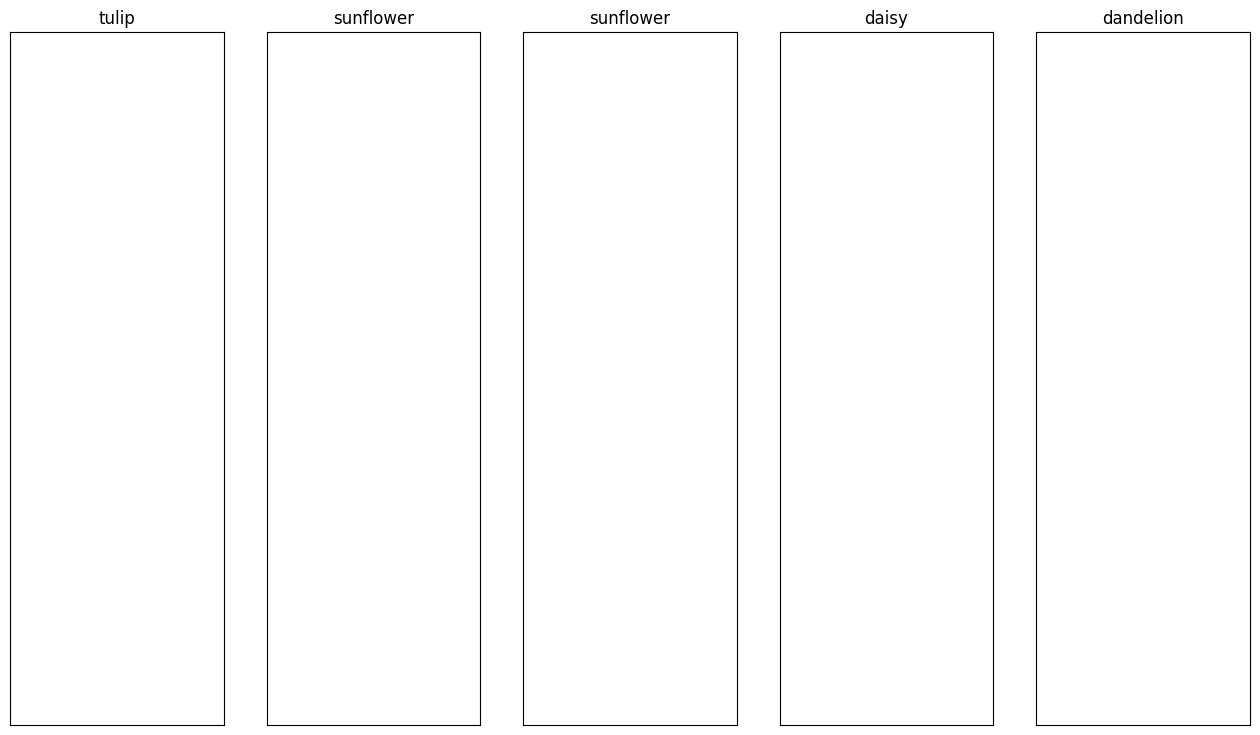

In [ ]:
# Display the first few training data samples with features, labels, and image file names
for i in range(5):  # Display the first 5 samples
    print(f"Sample {i + 1} - Label: {y[i]} - Folder: {folders[y[i]]} - Image File: {imagefile_names[i]}")
    print(f"Features (X):")
    #print(X[i])
    print("-----------------------------------------------------")

# Visualize the first 5 images
fig = plt.figure(figsize=(16, 9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    #ax.imshow(X[i].astype(np.uint8))
    ax.set_title(folders[y[i]])
plt.show()

## Use OneHotEncoder to convert to categorical data

In [ ]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [ ]:
# Reshape y to a 2D array
y_reshaped = y.reshape(-1, 1)

In [ ]:
# Perform one-hot encoding
y_onehot = encoder.fit_transform(y_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Display the one-hot encoded target labels
print('One-hot encoded target labels:')
print(y_onehot)

One-hot encoded target labels:
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


Removing the .pyc or .py files from X and y:
This loop iterates over the positions of .pyc or .py files found in the previous step.
np.delete(X, pos) removes the elements at the specified positions from the array X.
Similarly, np.delete(y, pos) removes the corresponding elements from the array y.

In [ ]:
# Find positions of .pyc or .py files in X
pos = [i for i, filename in enumerate(X) if filename.endswith('.pyc') or filename.endswith('.py')]

# Remove elements at the specified positions from X and y
X = np.delete(X, pos)
y = np.delete(y, pos)

# Verify the updated X and y arrays
print('Updated Data files - ', X)
print('Updated Target labels - ', y)

Updated Data files -  ['/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg'
 ...
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/10386540106_1431e73086_m.jpg'
 '/tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/164670176_9f5b9c7965.jpg']
Updated Target labels -  [3 1 1 ... 1 3 3]


## Convert a list of image file paths into an array of image data, resize the images, and print the shape of the resulting array and the first training item. The steps include:

###Importing necessary functions from Keras:

*  Defining the convert_img_to_arr function:
*  Converting the list of image arrays to a NumPy array:
*  Printing the shape of the array and the first training item:



In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 150, 150
    for file_path in file_path_list:
        img = load_img(file_path, target_size=(img_width, img_height))

        # Convert RGB image to grayscale
        img_gray = img.convert('L')

        # Convert grayscale image to array
        img_array = img_to_array(img_gray)

        arr.append(img_array)

    return arr
X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item : ', X[0])

(4317, 150, 150, 1)
First training item :  [[[ 98.]
  [ 34.]
  [ 26.]
  ...
  [ 82.]
  [ 83.]
  [ 62.]]

 [[ 34.]
  [ 27.]
  [ 24.]
  ...
  [ 40.]
  [ 58.]
  [ 66.]]

 [[ 54.]
  [ 29.]
  [ 30.]
  ...
  [ 44.]
  [ 29.]
  [ 27.]]

 ...

 [[ 89.]
  [ 76.]
  [ 65.]
  ...
  [109.]
  [ 99.]
  [ 88.]]

 [[ 99.]
  [ 95.]
  [ 88.]
  ...
  [102.]
  [100.]
  [ 96.]]

 [[148.]
  [109.]
  [163.]
  ...
  [ 32.]
  [ 72.]
  [ 94.]]]


Key Points:
The shape of training data is (4317, 150, 150, 3)
4317 is the number of training items or files
(150,150) is the target size or image size provided while loading image
1 refers to grayscale channel since the RGB channels were removed.

Sample 1 - Label: 3 - Folder: tulip - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/sunflower/7176729016_d73ff2211e.jpg
Features (X):
-----------------------------------------------------
Sample 2 - Label: 1 - Folder: sunflower - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/18385846351_3a2bf60427_n.jpg
Features (X):
-----------------------------------------------------
Sample 3 - Label: 1 - Folder: sunflower - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/dandelion/98992760_53ed1d26a9.jpg
Features (X):
-----------------------------------------------------
Sample 4 - Label: 0 - Folder: daisy - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/daisy/4851353993_2cbbbd1040_n.jpg
Features (X):
-----------------------------------------------------
Sample 5 - Label: 4 - Folder: dandelion - Image File: /tmp/Flower-Identification-using-deep-learning-main/flowers/tulip/2271507463_15c48d

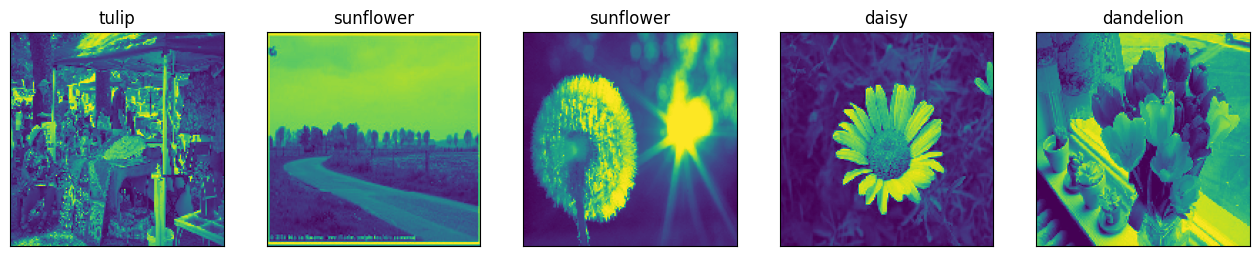

In [ ]:
# Display the first few training data samples with features, labels, and image file names
for i in range(5):  # Display the first 5 samples
    print(f"Sample {i + 1} - Label: {y[i]} - Folder: {folders[y[i]]} - Image File: {imagefile_names[i]}")
    print(f"Features (X):")
    #print(X[i])
    print("-----------------------------------------------------")

# Visualize the first 5 images
fig = plt.figure(figsize=(16, 9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].astype(np.uint8))
    ax.set_title(folders[y[i]])
plt.show()

Data type of X: float32
Min value in X: 0.0
Max value in X: 255.0
Labels: [3 1 1 0 4]
Corresponding folder names: ['tulip', 'sunflower', 'sunflower', 'daisy', 'dandelion']
Shape of first image: (150, 150, 1)


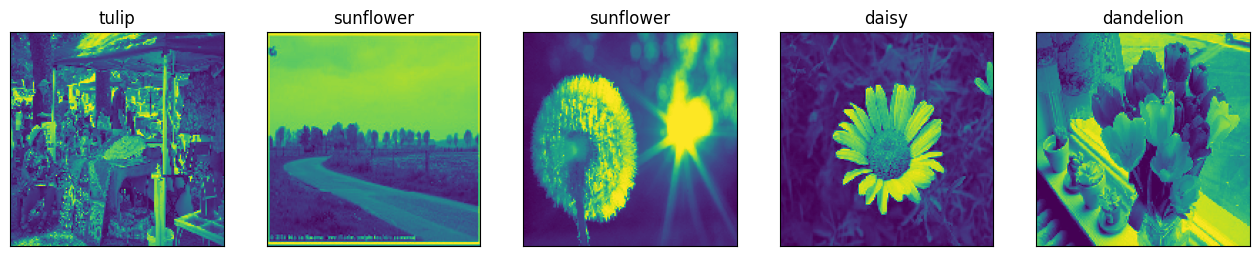

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Debugging: Check data type and range
print(f"Data type of X: {X.dtype}")
print(f"Min value in X: {X.min()}")
print(f"Max value in X: {X.max()}")

# Debugging: Check label indexing
print(f"Labels: {y[:5]}")
print(f"Corresponding folder names: {[folders[label] for label in y[:5]]}")

# Debugging: Check image shape
print(f"Shape of first image: {X[0].shape}")

fig = plt.figure(figsize=(16, 9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].astype(np.uint8))
    ax.set_title(folders[y[i]])
plt.show()

In [ ]:
# rescale the training data
X = X.astype('float32')/255
# Confirming number of class
num_classes = len(np.unique(y))
print('Number of classes : ', num_classes)

Number of classes :  5


In [ ]:
y

array([3, 1, 1, ..., 1, 3, 3])

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
y[0]

array([0., 0., 0., 1., 0.])

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into subsets and explore their shapes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  864
The training Data Shape  432


In [ ]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


In [ ]:
# Check the shape of X_train (input data) and X_test
print("Shape of X_train (input data):", X_train.shape)
print("Shape of X_test (input data):", X_test.shape)

Shape of X_train (input data): (3453, 150, 150, 3)
Shape of X_test (input data): (432, 150, 150, 3)


In [ ]:
# Use grayscale images

In [ ]:
# Check the shape of y_train (target labels) and y_test
print("Shape of y_train (target labels):", y_train.shape)
print("Shape of y_test (target labels):", y_test.shape)

Shape of y_train (target labels): (3453, 5)
Shape of y_test (target labels): (432, 5)


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input layer
inputs = Input(shape=(150, 150, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(5, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,587,493 (82.35 MB)

 Trainable params: 21,587,493 (82.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import time

start_time = time.time()  # Record the start time

from keras.optimizers import RMSprop

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001)  # You can adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using fit method
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

end_time = time.time()  # Record the end time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))